# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [3]:
table_01 = pd.pivot_table(data,
                          values= ['RetailSales', 'RetailTransfers', 'WarehouseSales'],
                          index= 'ItemType',
                          aggfunc=np.sum)
table_01

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72
REF,281.34,171.92,-6754.00
STR_SUPPLIES,995.98,3594.70,0.00
WINE,313400.42,340710.51,433009.47


In [4]:
# COLOR PALETTE
color_palette = ['#f94144', '#f3722c', '#f8961e', '#f9c74f', '#90be6d', '#43aa8b', '#577590', '#173F5F']

<AxesSubplot:>

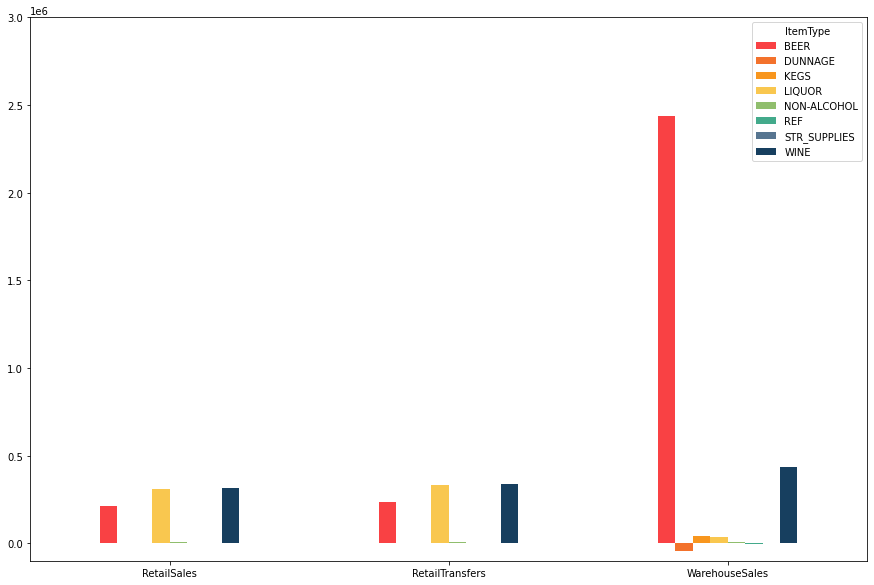

In [5]:
# WITH PANDAS
table_01.transpose().plot.bar(figsize=(15,10), 
                              color= color_palette, 
                              rot=0,
                              ylim = [-100000, 3000000])

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [6]:
table_02 = pd.pivot_table(data,
                          values= ['RetailSales', 'RetailTransfers', 'WarehouseSales'],
                          index= 'Supplier',
                          aggfunc=np.sum)

table_02['Total_Sales'] = table_02.sum(axis = 1, skipna = True)
table_02 = table_02.nlargest(10, 'Total_Sales')

<AxesSubplot:ylabel='Supplier'>

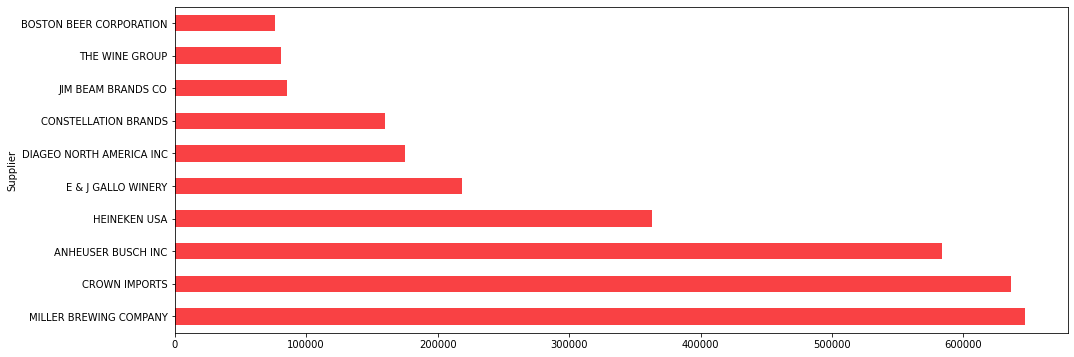

In [7]:
# Pandas Plot
table_02['Total_Sales'].plot.barh(figsize = (16,6),
                                  color= color_palette[0])

# For this lab, pandas plot is sooo much more simple

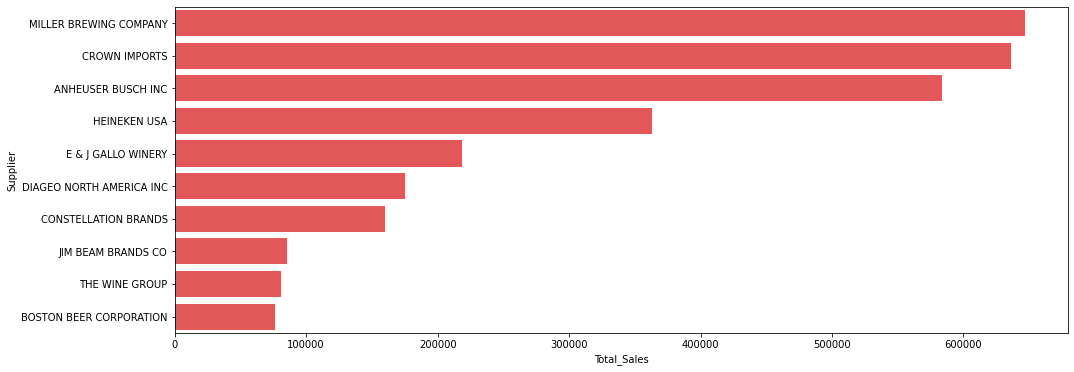

In [8]:
# Seaborn
fig = plt. figure(figsize = (16,6))
ax = sns.barplot(x = 'Total_Sales',
                 y = 'Supplier',
                 data = table_02.reset_index(),
                 color = color_palette[0])

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

<AxesSubplot:xlabel='Month'>

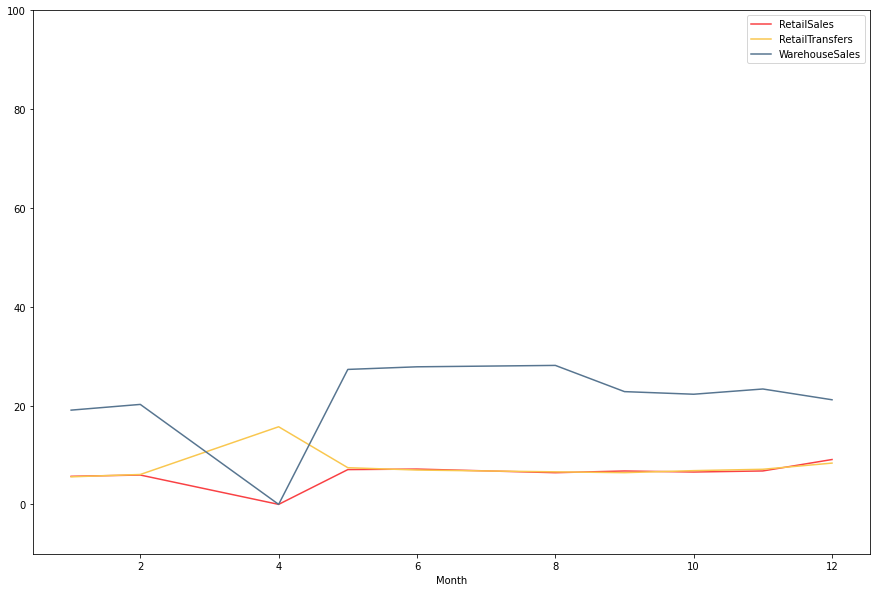

In [9]:
# Pandas Plot
table_03 = data[['RetailSales', 'RetailTransfers', 'WarehouseSales', 'Month']].groupby(['Month']).mean()
table_03.plot.line(figsize=(15,10), 
                  color= color_palette[0::3], 
                  rot=0,
                  ylim = [-10, 100])

## 4. Plot the same information as above but as a bar chart.

<AxesSubplot:xlabel='Month'>

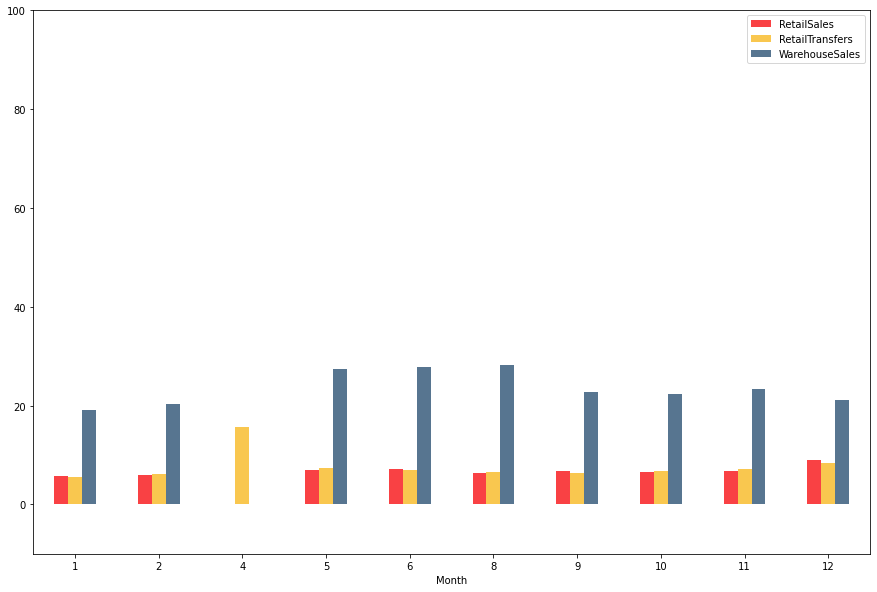

In [10]:
table_03.plot.bar(figsize=(15,10), 
                  color= color_palette[0::3], 
                  rot=0,
                  ylim = [-10, 100])

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [11]:
table_05 = pd.pivot_table(data,
                          values= 'RetailSales',
                          columns = 'ItemType',
                          index= ['Year', 'Month'],
                          fill_value=0.,
                          aggfunc=np.sum)
# Algunas columnas dan siempre cero

In [12]:
# Delete COLUMNS that are EMPTY
for col in table_05.columns:
    if table_05[col].sum() == 0:
        table_05.drop(columns=[col], inplace= True)
"""
# Delete ROWS that are EMPTY (this is optional though)
for r in table_05.index:
    if table_05.loc[r, :].sum() == 0:
        table_05.drop(index=r, inplace=True)
"""
        
table_05

ItemType        BEER    LIQUOR  NON-ALCOHOL    REF  STR_SUPPLIES      WINE
Year Month                                                                
2017 4          0.00      0.00         0.00   0.00          0.00      0.00
     5      25023.24  35123.36         0.00   0.00          0.00  34546.89
     6      27863.26  35035.31      1209.23  30.60         89.22  33129.64
     8      23030.13  32186.04      1091.28  19.54         77.34  30707.45
     9      23852.76  32532.32       997.11  38.88         94.64  32936.89
     10     22583.78  32491.59       945.63  22.82         84.38  33108.76
     11     23341.14  35524.77      1005.19  63.11        106.06  38275.92
     12     28822.16  49522.28      1316.44  41.21        439.64  51492.76
2018 1      16606.33  28579.87       732.25  23.66         56.94  29792.72
     2      18640.31  28852.31       812.84  41.52         47.76  29409.39

<AxesSubplot:xlabel='Year,Month'>

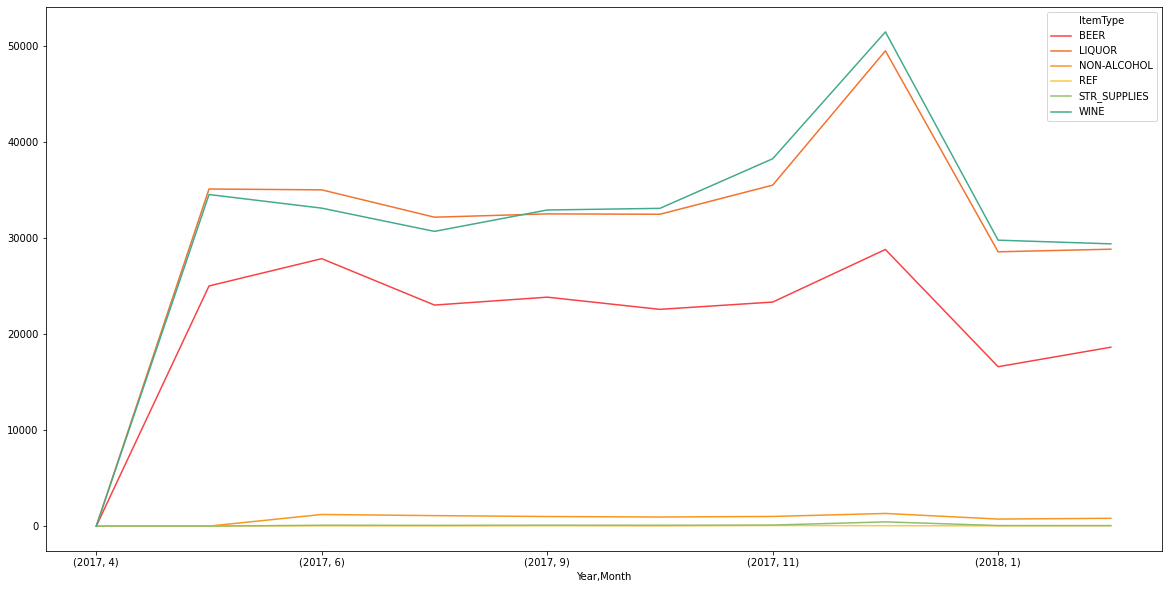

In [13]:
table_05.plot.line(figsize=(20,10), 
                  color= color_palette, 
                  rot=0)

## 6. Plot the same information as above but as a bar chart.

<AxesSubplot:xlabel='Year,Month'>

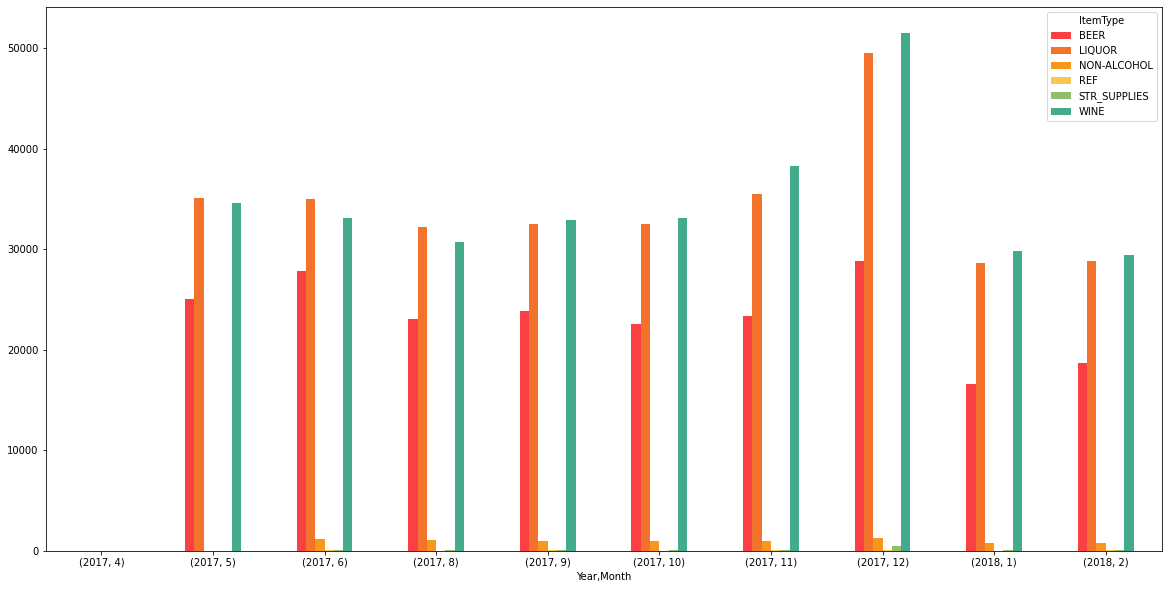

In [14]:
table_05.plot.bar(figsize=(20,10), 
                  color= color_palette, 
                  rot=0)

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

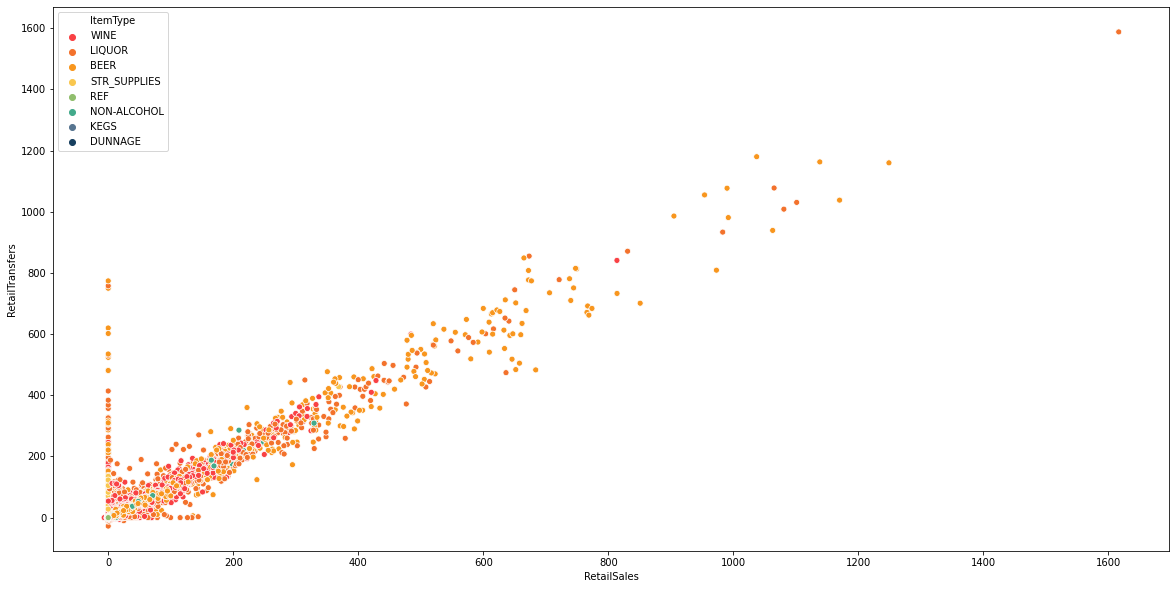

In [15]:
fig = plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="RetailSales", 
                     y="RetailTransfers",
                     hue="ItemType",
                     palette = color_palette,
                     data= data)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [16]:
filtr = ['ItemType'] + data.select_dtypes(include=['float64']).columns.tolist() 
table_08 = data[filtr]

In [17]:
filtr

['ItemType', 'RetailSales', 'RetailTransfers', 'WarehouseSales']

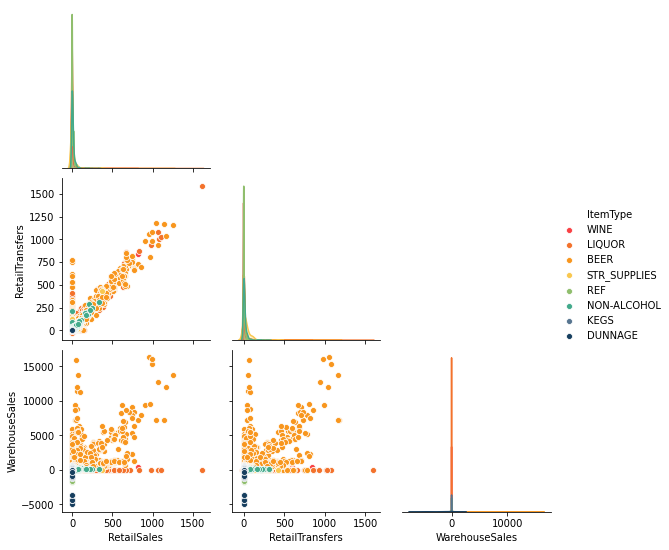

In [25]:
sns.pairplot(data= table_08,
             hue='ItemType',
             palette = color_palette,
             corner=True)